## Lab 2: Clustering 
### Alice Wu.  ID: qichaow
By applying different clustering methods, I think the **hierarchical method** is more flexible in trying different distance metrics. It is also easy to visualize and find the optimal hierachirial clusters by using the dendrogram. **K-means clustering** is good for numerical data, but for the categorical data, calulating the means of clusters might not be a good way to differntiate the data points. 

Here, I also tried **K-modes clustering**, by finding the mismatch between variables and update the mode of these mismatches. I think this method makes more sense for categorical data by finidng the mismatch and updating the cluster with the modes. 

Finally, I used **agglomerative clustering** with two different distance metrics: *Euclidean* and *Jaccard*. From the plots, we could observe that the Euclidean updates the clusters using distance, whiel Jaccard used the dissimilarity method (which is similar to k-modes).  

In [76]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from kmodes.kmodes import KModes

import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

In [77]:
df=pd.read_csv('/Users/aliceqichaowu/Desktop/38615/Lab2_clustering_dataset.csv')
df.head()

,ID,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,AAEAMMIUQZAASJ-MRXNPFEDSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
1,AAEFNWQXBPYXAC-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,0,...,1,0,1,1,1,0,0,1,1,1
2,AAMHSIWFDKXUMZ-UHFFFAOYSA-N,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,1
3,AAPQXEOSVSLLMB-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,AARXXEHXOBTROW-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1025 entries, ID to D_1023
dtypes: int64(1024), object(1)
memory usage: 7.6+ MB


In [79]:
# Check the df dimension and the missing values
print('Dataframe dimension: '+ str(df.shape) )
print('There are %i nan values in the dataframe' % df.isna().sum().sum())


Dataframe dimension: (969, 1025)
There are 0 nan values in the dataframe


In [80]:
# Select data for analysis
X=df.iloc[:,1:]

## K-means clustering

First, I use the elbow method to find the optimal number of clusters (k). I plot the Within-Cluster-Sum-of-Squares (WCSS) and its first derivative. The maximum of its 2nd derivative should be the optimal number k, which minimizes the cost most. 

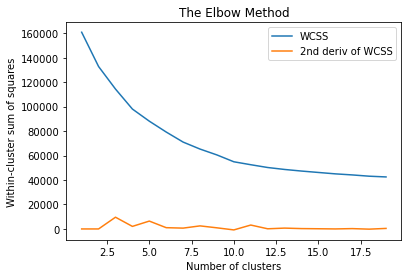

In [81]:
wcss = []
kcluster_list = range(1, 20)
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

diff2 = np.append([0, 0], np.diff(np.diff(wcss))) 

fig, ax = plt.subplots()

plt.plot(range(1, 20), wcss,label='WCSS')
plt.plot(kcluster_list, diff2, label='2nd deriv of WCSS')  
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')

ax.legend()
plt.show()

From the graph and the calcualtion bewlow, we can see the optimal number k is 3.

In [82]:
# Optimal number of clusters
k_opt = kcluster_list[np.argmax(diff2)]
print(k_opt)

3


In [83]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=k_opt, random_state=0) 
clusters = kmeans.fit(X)
labels = clusters.labels_  # predicted class (clusters)

## Visualization
I use t-SNE to visualize clusters with colored labels from k-means clustering. 

Text(0.5, 1.0, 'K-means clustering')

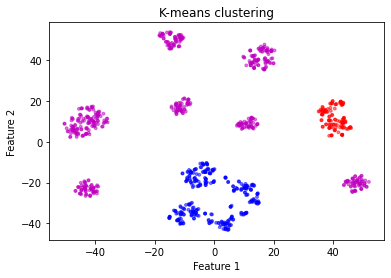

In [85]:
# Implement tSNE to visualize the clusters
tsne = manifold.TSNE(random_state=42,n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot clusters
df['labels'] = labels
colors = {0:'b', 1:'m',2:'r'}
fig1,ax = plt.subplots()
ax.scatter(X_tsne[:,0], X_tsne[:,1],c=df['labels'].map(colors), alpha=0.5,s=8)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.title('K-means clustering')

## K-modes clustering ( for categorical data)
Next, I tried another clustering method--K-modes clustering for catergorical data. The implementation of this algorithm is illustrated below:
1) Use dissimilarity measure for categorical objects. The measurement is finding the total mismatches between the data points (i.e. 1 and 0 are mismatch);
2) Assign each observation to its closest cluster;
3) Calculate the modes of clusters and update new modes;
4) Repeat until there are is no re-assignment required.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 240474.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 240474.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 240474.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 240474.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 240474.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 169, cost: 198349.0
Run 1, iteration: 2/100, moves: 21, cost: 198219.0
Run 1, iteration: 3/100, moves: 4, cost: 198209.0
Run 1, iteration: 4/100, moves: 0, cost: 198209.0
Init: initializing centroids
Init: initializi

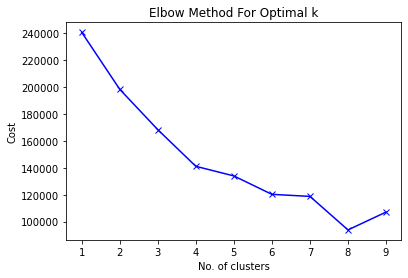

In [86]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [87]:
# Building the model with 4 clusters
kmode = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
clusters = kmode.fit_predict(X)
df['label_kmode'] =clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 165926.0
Run 1, iteration: 2/100, moves: 1, cost: 165920.0
Run 1, iteration: 3/100, moves: 0, cost: 165920.0


## Visualization

Text(0.5, 1.0, 'K-mode clustering')

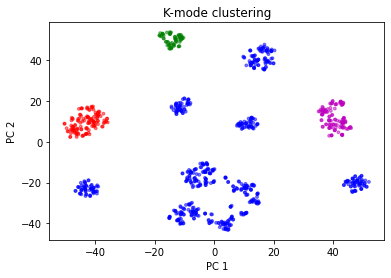

In [88]:
# Plot clusters
colors = {0:'b', 1:'m',2:'r',3:'g'}
fig1,ax = plt.subplots()
ax.scatter(X_tsne[:,0], X_tsne[:,1],c=df['label_kmode'].map(colors), alpha=0.5,s=8)
# ax.scatter(centers[:,0], centers[:,1],c='k', s=10)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
plt.title('K-mode clustering')

## Agglomerative Clustering
The third clustering method I tried is agglomerative Clustering, which is a type of hierarchical clustering algorithm (bottom-up). It links pairs of data points and merges into clusters based on the linkage distance metrics. Here, I used two distance metrics Euclidean and jaccard. 
Euclidean distance is by calculating the distance between two points.
Jaccard distance is by calculating the size of the intersection divided by the size of the union of two label sets. In simple words, it's used to find out disimilar two sets are.

## Find the optimal munber of clusters with dendrogram: k=5

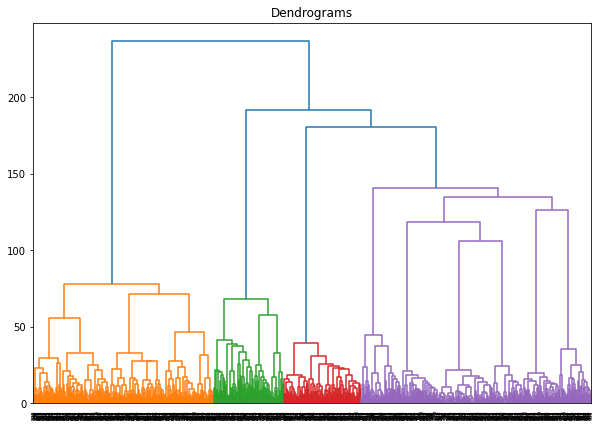

In [90]:
## Find the optimal number k based on the hierarchical structure
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [91]:
clst1 = AgglomerativeClustering(n_clusters=5,affinity='Euclidean',linkage='complete')
clst1.fit(X)
labels1 = clst1.labels_  # preicted class (clusters)
df['labels_Euclidean'] = labels1

clst2 = AgglomerativeClustering(n_clusters=5,affinity='jaccard',linkage='complete')
clst2.fit(X)
labels2 = clst2.labels_  # preicted class (clusters)
df['labels_jaccard'] = labels2


## Visualization
I use t-SNE to visualize clusters with colored labels from k-means clustering. 
From the plots of two different distance metrics method, their clusters are pretty similar. The only difference here is the cluster green and red clusters. What we can see from Euclidean method is that the clusters are far from each other, while the blue and red clusters in Jaccard are very close to each other indicating that it is not based on the distance itself.

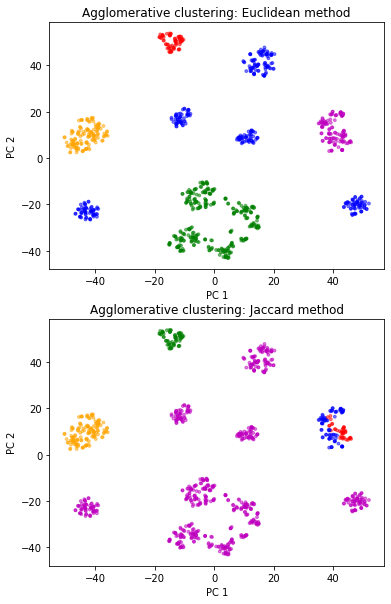

In [93]:
method=['Euclidean','Jaccard']
colors = {0:'b', 1:'m',2:'r',3:'g',4:'orange'}
fig,ax = plt.subplots(2,1,figsize=(6, 10))

# fig.tight_layout()
ax[0].scatter(X_tsne[:,0], X_tsne[:,1],c=df['labels_Euclidean'].map(colors), alpha=0.5,s=8)
ax[1].scatter(X_tsne[:,0], X_tsne[:,1],c=df['labels_jaccard'].map(colors), alpha=0.5,s=8)
for i in range(0,2):
    ax[i].set_xlabel('PC 1')
    ax[i].set_ylabel('PC 2')
    ax[i].set_title('Agglomerative clustering: '+method[i]+' method')